In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [505]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Sulawesi Selatan.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  381 non-null    datetime64[ns]
 1   Tn       370 non-null    float64       
 2   Tx       373 non-null    float64       
 3   Tavg     375 non-null    float64       
 4   RH_avg   375 non-null    float64       
 5   RR       369 non-null    float64       
 6   ss       376 non-null    float64       
 7   ff_x     376 non-null    float64       
 8   ddd_x    376 non-null    float64       
 9   ff_avg   376 non-null    float64       
 10  ddd_car  376 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB


<ipython-input-505-7e1113897be2>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [506]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.0,31.0,4.8,27.2
1,2023-02-01,25.0,31.5,0.0,27.7
2,2023-03-01,23.4,28.7,51.8,24.7
3,2023-04-01,23.3,26.6,74.2,23.9
4,2023-05-01,22.8,25.9,136.0,24.2
...,...,...,...,...,...
376,2023-12-16,25.4,32.2,8888.0,29.0
377,2023-12-17,26.1,32.8,0.0,26.9
378,2023-12-18,24.8,32.8,7.6,27.9
379,2023-12-19,23.8,31.6,0.0,27.4


In [507]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

53

In [508]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [509]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [510]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.0,31.0,4.8,27.2
1,31,31,2023-01-02,23.0,31.8,0.0,26.0
2,59,60,2023-01-03,22.9,28.7,25.4,24.5
3,90,92,2023-01-04,NaN,30.8,14.2,25.9
4,120,123,2023-01-05,24.2,33.2,0.2,28.1
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,NaN,NaN,NaN,NaN
350,350,377,2023-12-17,26.1,32.8,0.0,26.9
351,351,378,2023-12-18,24.8,32.8,7.6,27.9
352,352,379,2023-12-19,23.8,31.6,0.0,27.4


In [511]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          9
Tx          7
RR         11
Tavg        6
dtype: int64

In [512]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       5
dtype: int64

In [513]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

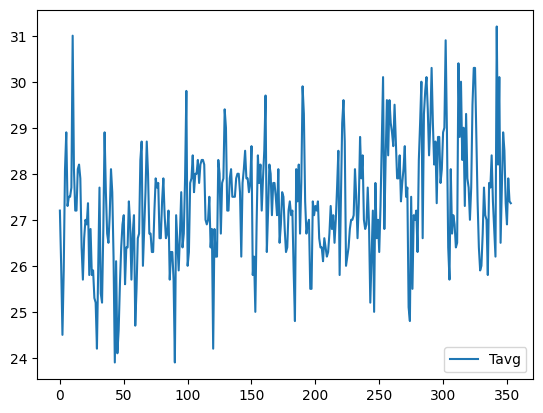

In [514]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

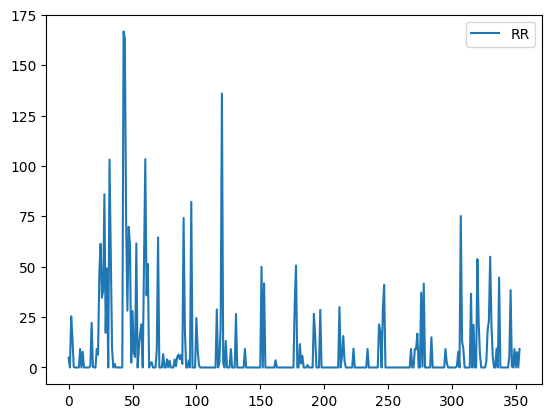

In [515]:
#plotting tavg
df1[['RR']].plot()

In [516]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.000000,31.000000,4.800000,27.200000,31.800000,26.000000,0.000000
1,31,31,2023-01-02,23.000000,31.800000,0.000000,26.000000,28.700000,24.500000,25.400000
2,59,60,2023-01-03,22.900000,28.700000,25.400000,24.500000,30.800000,25.900000,14.200000
3,90,92,2023-01-04,23.471884,30.800000,14.200000,25.900000,33.200000,28.100000,0.200000
4,120,123,2023-01-05,24.200000,33.200000,0.200000,28.100000,33.800000,28.900000,0.000000
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.471884,32.840922,9.158017,27.360458,32.800000,26.900000,0.000000
350,350,377,2023-12-17,26.100000,32.800000,0.000000,26.900000,32.800000,27.900000,7.600000
351,351,378,2023-12-18,24.800000,32.800000,7.600000,27.900000,31.600000,27.400000,0.000000
352,352,379,2023-12-19,23.800000,31.600000,0.000000,27.400000,32.840922,27.360458,9.158017


In [517]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,4.800000,27.200000,26.000000,0.000000
1,0.000000,26.000000,24.500000,25.400000
2,25.400000,24.500000,25.900000,14.200000
3,14.200000,25.900000,28.100000,0.200000
4,0.200000,28.100000,28.900000,0.000000
...,...,...,...,...
349,9.158017,27.360458,26.900000,0.000000
350,0.000000,26.900000,27.900000,7.600000
351,7.600000,27.900000,27.400000,0.000000
352,0.000000,27.400000,27.360458,9.158017


In [518]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,4.800000,27.200000,26.000000,0.000000
1,0.000000,26.000000,24.500000,25.400000
2,25.400000,24.500000,25.900000,14.200000
3,14.200000,25.900000,28.100000,0.200000
4,0.200000,28.100000,28.900000,0.000000
...,...,...,...,...
348,0.000000,28.500000,27.360458,9.158017
349,9.158017,27.360458,26.900000,0.000000
350,0.000000,26.900000,27.900000,7.600000
351,7.600000,27.900000,27.400000,0.000000


In [519]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [520]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,4.800000,27.200000,26.000000,0.000000,0
1,0.000000,26.000000,24.500000,25.400000,1
2,25.400000,24.500000,25.900000,14.200000,2
3,14.200000,25.900000,28.100000,0.200000,3
4,0.200000,28.100000,28.900000,0.000000,4
...,...,...,...,...,...
348,0.000000,28.500000,27.360458,9.158017,348
349,9.158017,27.360458,26.900000,0.000000,349
350,0.000000,26.900000,27.900000,7.600000,350
351,7.600000,27.900000,27.400000,0.000000,351


In [521]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [522]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [523]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [524]:
X_test

,Indeks,Tavg
282,282,29.100000
283,283,30.000000
284,284,26.600000
285,285,29.300000
286,286,29.800000
...,...,...
348,348,28.500000
349,349,27.360458
350,350,26.900000
351,351,27.900000


In [525]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.30200091, 28.71740572, 27.15622998, 28.3990406 , 28.63057746,
       28.77018033, 28.45011331, 27.99214532, 28.31561615, 28.86892193,
       28.31901996, 27.90701895, 28.13855581, 27.52451079, 28.1879266 ,
       28.18962851, 27.73166052, 27.87126339, 28.24070121, 28.28837011,
       29.16344481, 28.24580693, 27.09833409, 26.77826707, 27.88317672,
       27.24134077, 27.42691063, 27.33667856, 27.10854552, 27.15621441,
       28.95062891, 28.21685898, 28.77016476, 27.99042784, 28.31389867,
       27.53416175, 28.45520345, 27.8133675 , 27.72313542, 27.4030684 ,
       27.72653923, 28.55564695, 28.92508477, 28.92678668, 28.23898374,
       27.59714779, 27.13917979, 26.91104675, 26.95871565, 27.28218648,
       27.74355828, 27.46945824, 27.42519316, 26.87529119, 27.79633289,
       27.7520678 , 28.07553863, 27.61757064, 27.34347061, 27.06937057,
       29.36942196, 27.99211418, 28.86718888, 27.21407916, 27.76738494,
       28.32069072, 28.13852467, 27.61641363, 27.40645664, 27.86

In [526]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.016253030678181 1.625059289562965


In [527]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.100000
283,283,30.000000
284,284,26.600000
285,285,29.300000
286,286,29.800000
...,...,...
348,348,28.500000
349,349,27.360458
350,350,26.900000
351,351,27.900000


In [528]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.302001
283,28.717406
284,27.156230
285,28.399041
286,28.630577
...,...
348,28.138525
349,27.616414
350,27.406457


In [529]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-529-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.200000,NaN
1,26.000000,NaN
2,24.500000,NaN
3,25.900000,NaN
4,28.100000,NaN
...,...,...
348,28.500000,28.138525
349,27.360458,27.616414
350,26.900000,27.406457
351,27.900000,27.867828


<Axes: >

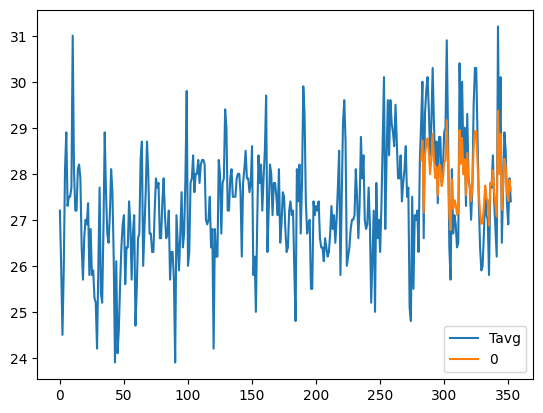

In [530]:
kan.plot()

In [531]:
new_data = [[354, 27.4],[355,27.4],[356,27.4],[357,27.4],[358,27.4],[359,27.4],[360,27.4]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.64309921, 27.64480111, 27.64650302, 27.64820492, 27.64990682,
       27.65160873, 27.65331063])

In [533]:
kan.to_json('Prediksi Sulawesi Selatan.json')